# Project Foundations for Data Science: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#import the library for probability distributions and statistical functions
import scipy.stats as stats

# to suppress warnings
import warnings
warnings.filterwarnings('ignore')

### Understanding the structure of the data

In [ ]:
# connect to Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# read the data
df = pd.read_csv('/content/drive/MyDrive/Colab-Notebooks/foodhub_order.csv')
# returning the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [ ]:
# returning the tail (last 5 rows)
df.tail()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,Not given,31,24
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.18,Weekday,5,23,31
1897,1478056,120353,Blue Ribbon Sushi,Japanese,19.45,Weekend,Not given,28,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer. The DataFrame has 1,898 rows of data, or the information associated with 1,897 orders.

### How many rows and columns are present in the data?

In [ ]:
# checking the shape of the dataset
df.shape

(1898, 9)

#### Observations:

There are 1,898 rows and 9 columns within the dataset.

### What are the datatypes of the different columns in the dataset?

In [ ]:
# checking the information summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:

All columns have 1,898 observations, meaning that there are no null values.

The following colummns are **int64 datatypes**, or integers:
*   order_id
*   customer_id
*   food_preparation_time
*   delivery_time

The following colummns are **object** datatypes, which is a form of text:
*   restaurant_name
*   cuisine_type
*   day_of_the_week
*   rating

The following colummns are **float64** datatypes, which is a numerical format that contains decimals:
*   cost_of_the_order

Some of the categories' datatypes need to be adjusted, as listed below:

*   rating is read as an object datatype, but it should be read as an integer datatype
*   cuisine_type and day_of_the_week are read as object datatypes, but are categorical datatype
*   order_id and customer_id are read as integers, but should be in the object format

### Are there any missing values in the data? If yes, treat them using an appropriate method

According to the information summary, it does not appear that there are any missing values. However, when taking the head and tail into account, there are some values within the 'rating' category that represent technically missing information, and are represented with an entry of 'Not given". This rating column will be viewed as categorical informtion, with options of 1-5 and "Not given".

In [ ]:
# double checking that there are no missing values
df.isna().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:

The above output shows that there is no missing data in the dataset.

The next step will be to change the inaccurate datatypes.

In [ ]:
# starting by making a list of all categorical variables
categorical = ['cuisine_type', 'day_of_the_week','rating']

# printing the count of each unique value in each categorical column
for column in categorical:
    print(df[column].value_counts())

    print('-' * 50)

American          584
Japanese          470
Italian           298
Chinese           215
Mexican            77
Indian             73
Middle Eastern     49
Mediterranean      46
Thai               19
French             18
Southern           17
Korean             13
Spanish            12
Vietnamese          7
Name: cuisine_type, dtype: int64
--------------------------------------------------
Weekend    1351
Weekday     547
Name: day_of_the_week, dtype: int64
--------------------------------------------------
Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64
--------------------------------------------------


The above output shows that there are 14 options within 'cuisine_type'. There are 2 options within 'day_of_the_week'. There are 4 options within rating that exist within this dataset. The counts are not equal across the options for either of the columns.

In [ ]:
# Converting customer_id datatype to string
df['customer_id'] = df['customer_id'].apply(str)

In [ ]:
# Converting order_id datatype to string
df['order_id'] = df['order_id'].apply(str)

In [ ]:
# checking info to confirm changes of the updated datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   object 
 1   customer_id            1898 non-null   object 
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 133.6+ KB


*   The above output shows that the datatype of each column has been updated to the intended datatype.

### Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed?

In [ ]:
# checking the statistical summary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cost_of_the_order,1898.0,16.498851,7.483812,4.47,12.08,14.14,22.2975,35.41
food_preparation_time,1898.0,27.371970,4.632481,20.00,23.00,27.00,31.0000,35.00
delivery_time,1898.0,24.161749,4.972637,15.00,20.00,25.00,28.0000,33.00


#### Observations:

*   The minimum time for food to be prepared once an order is placed is 20 minutes.
*   The average time for food to be prepared once an order is placed is 27 minutes and 22 seconds.
*   The maxiumum time for food to be prepared once an order is placed is 35 minutes.

In [ ]:
# investigating the non-numerical columns
df.describe(exclude = 'number').T

,count,unique,top,freq
order_id,1898,1898,1477147,1
customer_id,1898,1200,52832,13
restaurant_name,1898,178,Shake Shack,219
cuisine_type,1898,14,American,584
day_of_the_week,1898,2,Weekend,1351
rating,1898,4,Not given,736


#### Observations:

*   There are 1,200 unique customers within this dataset.
*   There are 178 restaurants within this dataset, and the most common is Shake Shack.
*   There are 14 types of cuisines listed within this dataset, and the most common is American.
*   It is more common for orders to be placed on the weekends, compared to weekdays.
*   It is most common for there to be no rating associated with the orders in this dataset.

### How many orders are not rated?

In [ ]:
# checking count of orders with no rating
df.describe(exclude = 'number').T

,count,unique,top,freq
order_id,1898,1898,1477147,1
customer_id,1898,1200,52832,13
restaurant_name,1898,178,Shake Shack,219
cuisine_type,1898,14,American,584
day_of_the_week,1898,2,Weekend,1351
rating,1898,4,Not given,736


In [ ]:
# checking count of orders with no rating in another way
# printing the count of each unique value in the rating column
print(df.rating.value_counts())

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64


#### Observations:
Both of the above outputs show that the amount of orders that had no rating is 736 orders.

Also, while the customers have the option to select ratings through 5, the only values selected within the orders in this dataset are 3, 4, and 5. All other customers did not provide a rating.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

###Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration)

In [ ]:
# starting with numerical variables and defining histogram function

def histogram_boxplot(feature, figsize=(10, 10), bins='auto'):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (10, 10)
    bins: number of bins ('auto')
    """
    f, (ax_box, ax_hist) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid
        sharex=True,  # The X-axis will be shared among all the subplots
        gridspec_kw={"height_ratios": (.25, .75)},
        figsize=figsize
    )

    # Creating the subplots
    # Boxplot will be created and the mean value of the column will be indicated using some symbol
    sns.boxplot(x=feature, ax=ax_box, showmeans=True, color='red')

    # For histogram
    sns.histplot(x=feature, kde=False, ax=ax_hist, bins=bins)
    ax_hist.axvline(np.mean(feature), color='g', linestyle='--')      # Add mean to the histogram
    ax_hist.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

    plt.show()

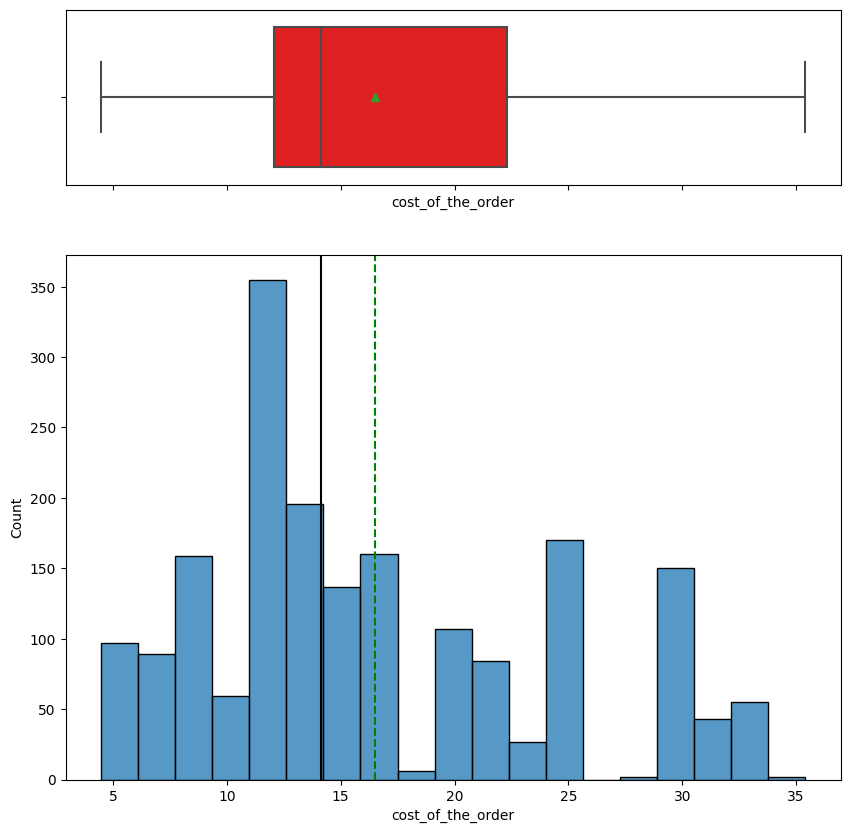

In [ ]:
# investigating the cost variable
histogram_boxplot(df.cost_of_the_order)

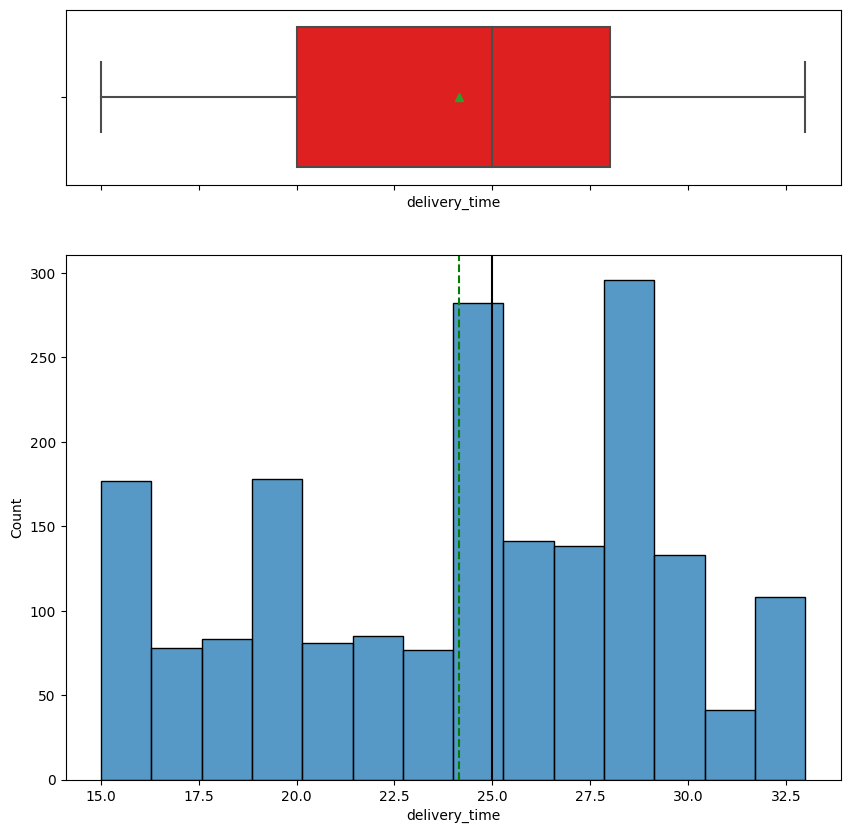

In [ ]:
# investigating the delivery time variable
histogram_boxplot(df.delivery_time)

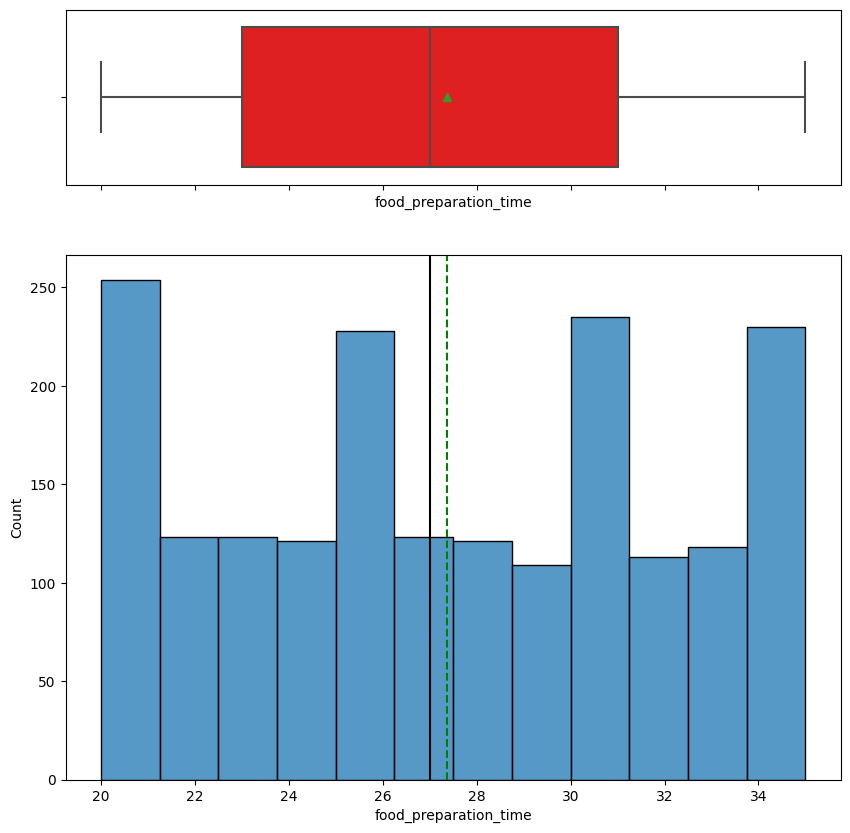

In [ ]:
# investigating the food preparation time variable
histogram_boxplot(df.food_preparation_time)

**Observations of numerical variables:**

The distribution of the cost of the orders is similar to a normal distribution; however, it is skewed slightly to the right. The mean is greater than the median, due to the tail on the right side of the count plot above.

For delivery time and food preparation time, both distributions appear to be generally uniform between their max and min values.

In [ ]:
# visualizing the categorical variables

def bar_percent_1(data, z):
    total = len(data[z]) # Length of the column
    plt.figure(figsize = (10, 5))

    # Convert the column to a categorical data type
    data[z] = data[z].astype('category')

    ax = sns.countplot(x=z, data=data, palette='Paired', order=data[z].value_counts().index)

    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total) # Percentage of each class
        x = p.get_x() + p.get_width() / 2 - 0.05                    # Width of the plot
        y = p.get_y() + p.get_height()                              # Height of the plot
        ax.annotate(percentage, (x, y), size = 10)                  # Annotate the percentage
        plt.xticks(rotation=90);                                    # Rotating the labels

    plt.show()                                                      # Display the plot

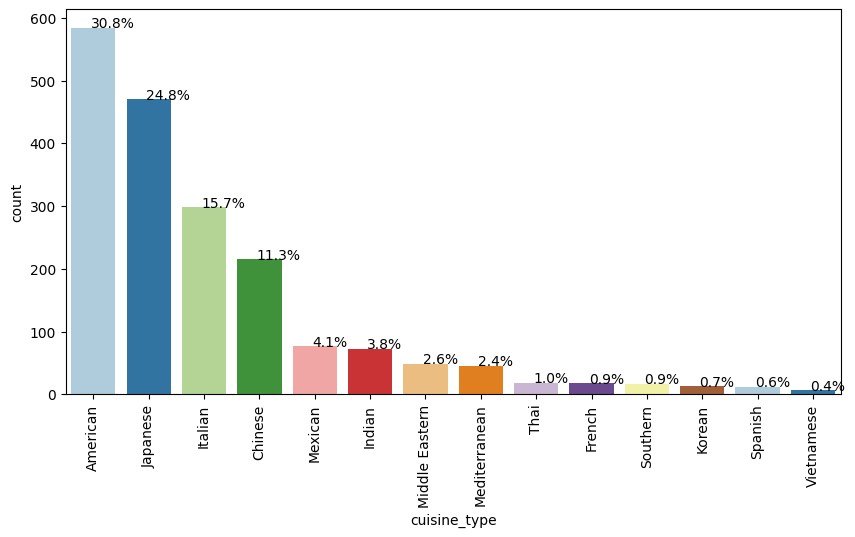

In [ ]:
# investigating the cuisine type variable

bar_percent_1(df, 'cuisine_type')

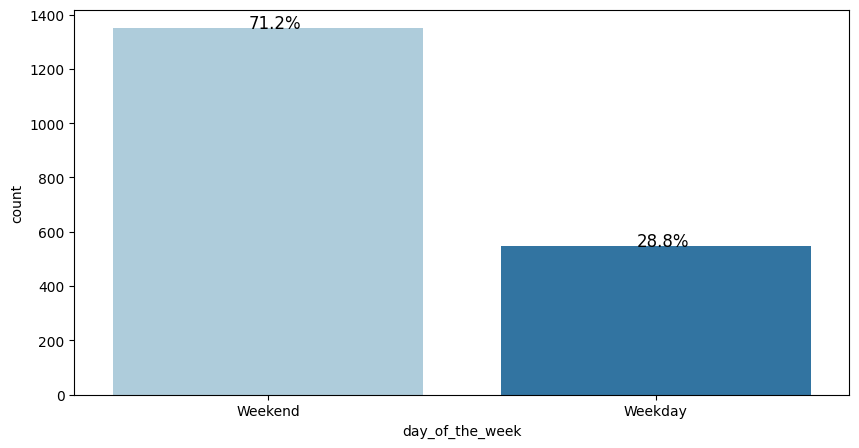

In [ ]:
# investigating the day of the week variable

# defining an additional function
def bar_percent_2(data, z):
    total = len(data[z]) # Length of the column
    plt.figure(figsize = (10, 5))

    # Convert the column to a categorical data type
    data[z] = data[z].astype('category')

    ax = sns.countplot(x=z, data=data, palette='Paired', order=data[z].value_counts().index)

    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total) # Percentage of each class
        x = p.get_x() + p.get_width() / 2 - 0.05                    # Width of the plot
        y = p.get_y() + p.get_height()                              # Height of the plot
        ax.annotate(percentage, (x, y), size = 12)                  # Annotate the percentage

    plt.show()                                                      # Display the plot

# vizualizting the plot
bar_percent_2(df, 'day_of_the_week')

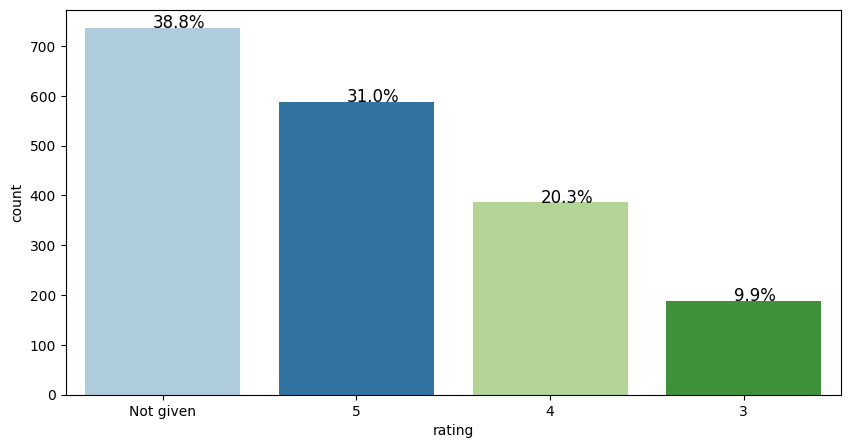

In [ ]:
# investigating the rating variable

bar_percent_2(df, 'rating')

**Observations of Categorical Variables:**

*   The top four most frequently ordered cuisine types are American, Japanese, Italian, and Chinese, which collectively equates to 82.6% of all the orders.
*   The majority of the orders (71.2%) are placed over the weekend, while only 28.8% of orders are placed during weekdays.
*   It is most frequent (38.8%) that customers do not give a rating on their order. Of orders that are rated, '5' is most common (31%) and is followed by '4' and '3' (20.3% and 9.9%, respectively). No ratings less than 3 are provided.



### Which are the top 5 restaurants in terms of the number of orders received?

In [ ]:
# printing the count of each unique value in restaurant_name column
print(df.restaurant_name.value_counts()) # this will list the restaurants in descending order by the amount of orders in the dataset

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Sushi Choshi                   1
Dos Caminos Soho               1
La Follia                      1
Philippe Chow                  1
'wichcraft                     1
Name: restaurant_name, Length: 178, dtype: int64


#### Observations:

As shown in the above output, the top five restaurants in terms of the number of orders received are as follows, in descending order: Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken, and Parm.

### Which is the most popular cuisine on weekends?

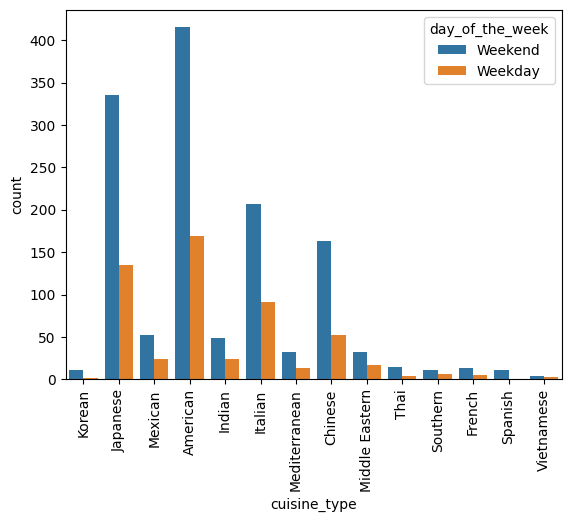

In [ ]:
# making a multivariate bar graph
sns.countplot(data=df, x='cuisine_type', hue='day_of_the_week')
plt.xticks(rotation=90);

#### Observations:

As shown in the bar graph above, the most popular cuisine on the weekends is American.

### What percentage of the orders cost more than 20 dollars?

In [ ]:
# find number of orders with a cost greater than $20
num_orders_over_20 = df[df['cost_of_the_order']>20]

# find the percentage of orders that cost over $20
percent_orders_over_20 = (num_orders_over_20.shape[0] / df.shape[0])

print(round(percent_orders_over_20,2))

0.29


#### Observations:

Within this dataset, 29% of the orders cost more than $20.

### What is the mean order delivery time?

In [ ]:
#solving for mean
df['delivery_time'].mean()

24.161749209694417

#### Observations:

The average order delivery time is 24 minutes and 10 seconds.

### The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed

In [ ]:
# printing the count of each unique value in customer_id column
print(df.customer_id.value_counts()) # this will list the customer IDs in descending order by the amount of orders in the dataset

52832     13
47440     10
83287      9
250494     8
259341     7
          ..
385426     1
254913     1
289597     1
74412      1
397537     1
Name: customer_id, Length: 1200, dtype: int64


#### Observations:

This customer with ID 52832 has the most orders in this dataset, which is 13 orders. The customers with the second and third most orders in the dataset have IDs 47440 and 83287, with 10 and 9 orders, respectively.

### Multivariate Analysis

### Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables)

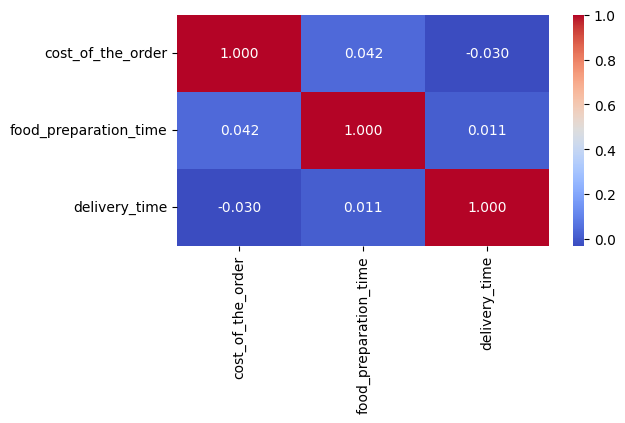

In [ ]:
# Starting with correlation heatmap for numerical variables

num_var = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
corr = df[num_var].corr()

# Plot the heatmap
plt.figure(figsize = (6, 3))
sns.heatmap(corr, annot = True, cmap = 'coolwarm',
        fmt = ".3f",
        xticklabels = corr.columns,
        yticklabels = corr.columns);



*   The above heatmap shows some slight positive and negative correlations, but these are not very strong.
*   There is a **weak** negative correlation between the cost of the order and the delivery time (i.e., as the cost increases, the delivery time decreases).
*   There is a **weak** positive correlation between food preparation time and the cost of the order (i.e., as the cost increases, the food preparation time increases as well).
*   Correlation does not necessarily represent causation.
*   Additional investigation that incorporates the categorical variables is warranted.



### The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders

In [ ]:
# making a function to calculate total revenue

revenue=0
for i in df.cost_of_the_order:
  if i > 20:
    revenue += df.cost_of_the_order * 0.25
  elif i > 5:
    revenue += df.cost_of_the_order * 0.15
  else:
    pass

print(revenue)

0       10419.6375
1        4093.3080
2        4144.1355
3        9894.4200
4        3927.2715
           ...    
1893     7559.7435
1894     4127.1930
1895     8545.7970
1896     4127.1930
1897     6590.6325
Name: cost_of_the_order, Length: 1898, dtype: float64


#### Observations:

The company's total revenue is $10,419.63.

### The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered)

In [ ]:
# making a new column to sum food preparation time and food delivery time

df['total_time'] =  df[['food_preparation_time', 'delivery_time']].sum(axis=1)

In [ ]:
# checking to make sure this worked properly
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,total_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,45
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,48
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,51
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,40
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,49


In [ ]:
#cdf calculations

mu = df['total_time'].mean() #solving for mean of parameter
sigma = df['total_time'].std() #solving for standard deviation of parameter

time_over_60 = 1 - norm.cdf(60, mu, sigma) # assuming normal distribution due to central limit theorem
print(round(time_over_60,2))

0.11


#### Observations:

Within this dataset, 11% of the orders take more than 60 minutes to get delivered from the time the order is placed.

---